<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/SHIFT/desafio/baba/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import sklearn.linear_model as LM
import sklearn.ensemble as E
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from datetime import datetime
from pycaret.regression import *
import numpy as np

In [3]:
df = pd.read_csv("BABA.csv", )
df.drop(columns=['Y', 'X'], inplace=True)
df

,date,mes,weekday,margem,venda,desconto,outdesc,outmg
0,20140801,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0
1,20140802,agosto,sabado,0.416022,58377.320,5713.043012,0,0
2,20140803,agosto,domingo,0.431993,64635.390,8621.708915,0,0
3,20140804,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0
4,20140805,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0
...,...,...,...,...,...,...,...,...
391,20150827,agosto,quinta-feira,0.451562,NaN,5846.133551,0,0
392,20150828,agosto,sexta-feira,0.472608,NaN,2657.847261,0,0
393,20150829,agosto,sabado,0.385612,NaN,269.530000,0,0
394,20150830,agosto,domingo,0.495615,NaN,3434.838118,0,0


In [4]:
df.index = pd.to_datetime(df['date'], format='%Y%m%d')
df.drop(columns=['date'], inplace=True)
df

,mes,weekday,margem,venda,desconto,outdesc,outmg
date,,,,,,,
2014-08-01,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0
2014-08-02,agosto,sabado,0.416022,58377.320,5713.043012,0,0
2014-08-03,agosto,domingo,0.431993,64635.390,8621.708915,0,0
2014-08-04,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0
2014-08-05,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0
...,...,...,...,...,...,...,...
2015-08-27,agosto,quinta-feira,0.451562,NaN,5846.133551,0,0
2015-08-28,agosto,sexta-feira,0.472608,NaN,2657.847261,0,0
2015-08-29,agosto,sabado,0.385612,NaN,269.530000,0,0


In [5]:
df2 = pd.read_csv("dollar.csv", sep=';')
df2.index = pd.to_datetime(df2['date'], format='%Y-%m-%d')
df['DOLLAR'] = df2['DOLLAR']
df['DOLLAR'].fillna(method='ffill', inplace=True)
df

,mes,weekday,margem,venda,desconto,outdesc,outmg,DOLLAR
date,,,,,,,,
2014-08-01,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0,2.2603
2014-08-02,agosto,sabado,0.416022,58377.320,5713.043012,0,0,2.2603
2014-08-03,agosto,domingo,0.431993,64635.390,8621.708915,0,0,2.2603
2014-08-04,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0,2.2523
2014-08-05,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0,2.2540
...,...,...,...,...,...,...,...,...
2015-08-27,agosto,quinta-feira,0.451562,NaN,5846.133551,0,0,3.5941
2015-08-28,agosto,sexta-feira,0.472608,NaN,2657.847261,0,0,3.5502
2015-08-29,agosto,sabado,0.385612,NaN,269.530000,0,0,3.5502


<Axes: xlabel='date'>

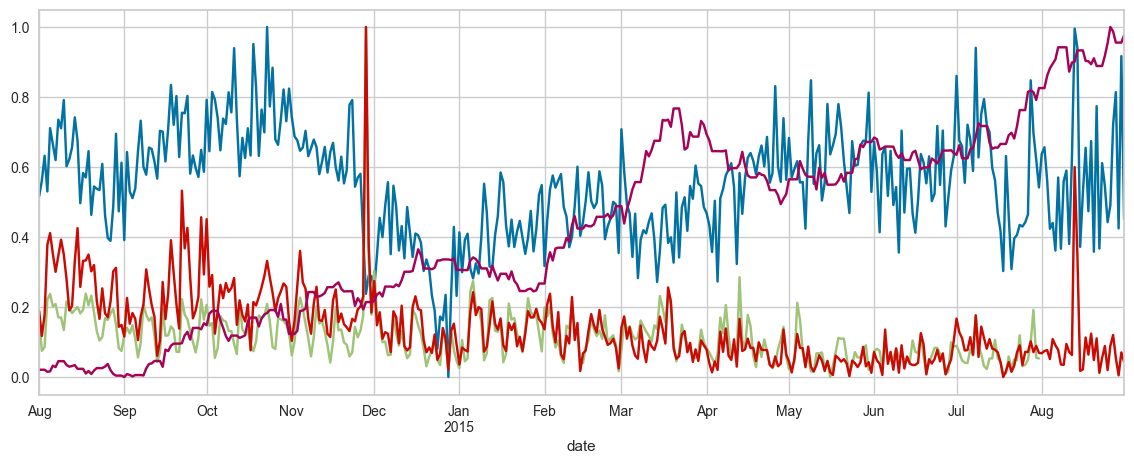

In [6]:
scaler = MinMaxScaler(feature_range=(0,1)) # muito útil na hora de construir scores para valores | Ex: quando quero classificar clientes criando scores entre eles
df['_margem'], df['_venda'], df['_desconto'], df['_DOLLAR'] = scaler.fit_transform(df[['margem']]), scaler.fit_transform(df[['venda']]), scaler.fit_transform(df[['desconto']]), scaler.fit_transform(df[['DOLLAR']])
df[['_margem', '_venda', '_desconto', '_DOLLAR']].plot(figsize=(14,5) )

In [7]:
df.corr()

,margem,venda,desconto,outdesc,outmg,DOLLAR,_margem,_venda,_desconto,_DOLLAR
margem,1.000000,-0.087768,0.264945,0.061757,-0.234386,-0.097921,1.000000,-0.087768,0.264945,-0.097921
venda,-0.087768,1.000000,0.799616,0.483898,-0.077013,-0.385052,-0.087768,1.000000,0.799616,-0.385052
desconto,0.264945,0.799616,1.000000,0.467836,-0.069002,-0.593596,0.264945,0.799616,1.000000,-0.593596
outdesc,0.061757,0.483898,0.467836,1.000000,-0.006225,-0.007718,0.061757,0.483898,0.467836,-0.007718
outmg,-0.234386,-0.077013,-0.069002,-0.006225,1.000000,-0.024677,-0.234386,-0.077013,-0.069002,-0.024677
DOLLAR,-0.097921,-0.385052,-0.593596,-0.007718,-0.024677,1.000000,-0.097921,-0.385052,-0.593596,1.000000
_margem,1.000000,-0.087768,0.264945,0.061757,-0.234386,-0.097921,1.000000,-0.087768,0.264945,-0.097921
_venda,-0.087768,1.000000,0.799616,0.483898,-0.077013,-0.385052,-0.087768,1.000000,0.799616,-0.385052
_desconto,0.264945,0.799616,1.000000,0.467836,-0.069002,-0.593596,0.264945,0.799616,1.000000,-0.593596
_DOLLAR,-0.097921,-0.385052,-0.593596,-0.007718,-0.024677,1.000000,-0.097921,-0.385052,-0.593596,1.000000


In [8]:
#df = df.drop(df[df['mes'] == 'novembro'].index)

In [9]:
# Função para atribuir o valor 1 se maior que 200, caso contrário, 0
def atribuir_valor(valor):
    if valor > 200000:
        return 1
    else:
        return 0
# Criar a nova coluna com base na função atribuir_valor
df['outvenda'] = df['venda'].apply(atribuir_valor)

In [10]:
# Função para atribuir o valor 1 se maior que 200, caso contrário, 0
def atribuir_valor(valor):
    if valor == 'sabado' or valor == 'domingo':
        return 1
    else:
        return 0
# Criar a nova coluna com base na função atribuir_valor
df['fds'] = df['weekday'].apply(atribuir_valor)

In [11]:
# Função para atribuir o valor 1 se maior que 200, caso contrário, 0
def atribuir_valor(valor):
    if valor == 'segunda-feira':
        return 1
    else:
        return 0
# Criar a nova coluna com base na função atribuir_valor
df['segunda'] = df['weekday'].apply(atribuir_valor)

In [12]:
#df[df['segunda-feira'] == 1]

In [13]:
df.corr()

,margem,venda,desconto,outdesc,outmg,DOLLAR,_margem,_venda,_desconto,_DOLLAR,outvenda,fds,segunda
margem,1.000000,-0.087768,0.264945,0.061757,-0.234386,-0.097921,1.000000,-0.087768,0.264945,-0.097921,-0.132085,0.024584,-0.055988
venda,-0.087768,1.000000,0.799616,0.483898,-0.077013,-0.385052,-0.087768,1.000000,0.799616,-0.385052,0.535747,-0.363572,0.222426
desconto,0.264945,0.799616,1.000000,0.467836,-0.069002,-0.593596,0.264945,0.799616,1.000000,-0.593596,0.366422,-0.210041,0.071026
outdesc,0.061757,0.483898,0.467836,1.000000,-0.006225,-0.007718,0.061757,0.483898,0.467836,-0.007718,0.404617,-0.055551,0.047140
outmg,-0.234386,-0.077013,-0.069002,-0.006225,1.000000,-0.024677,-0.234386,-0.077013,-0.069002,-0.024677,-0.005076,0.033379,-0.029215
DOLLAR,-0.097921,-0.385052,-0.593596,-0.007718,-0.024677,1.000000,-0.097921,-0.385052,-0.593596,1.000000,-0.056499,-0.001876,0.002864
_margem,1.000000,-0.087768,0.264945,0.061757,-0.234386,-0.097921,1.000000,-0.087768,0.264945,-0.097921,-0.132085,0.024584,-0.055988
_venda,-0.087768,1.000000,0.799616,0.483898,-0.077013,-0.385052,-0.087768,1.000000,0.799616,-0.385052,0.535747,-0.363572,0.222426
_desconto,0.264945,0.799616,1.000000,0.467836,-0.069002,-0.593596,0.264945,0.799616,1.000000,-0.593596,0.366422,-0.210041,0.071026
_DOLLAR,-0.097921,-0.385052,-0.593596,-0.007718,-0.024677,1.000000,-0.097921,-0.385052,-0.593596,1.000000,-0.056499,-0.001876,0.002864


In [14]:
#nov
#df.loc[df['mes'] == 'novembro', 'venda'] = df.iloc[0:365,]['venda'].mean()

#dias da semana
#df_aux = df.iloc[0:365,][['venda', 'weekday']]
#m_seg = df_aux[df_aux['weekday'] == 'segunda-feira']['venda'].mean()
#m_ter = df_aux[df_aux['weekday'] == 'terca-feira']['venda'].mean()
#m_qua = df_aux[df_aux['weekday'] == 'quarta-feira']['venda'].mean()
#m_qui = df_aux[df_aux['weekday'] == 'quinta-feira']['venda'].mean()
#m_sex = df_aux[df_aux['weekday'] == 'sexta-feira']['venda'].mean()
#m_sab = df_aux[df_aux['weekday'] == 'sabado']['venda'].mean()
#m_dom = df_aux[df_aux['weekday'] == 'domingo']['venda'].mean()

#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'segunda-feira'), 'venda'] = m_seg 
#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'terca-feira'), 'venda'] = m_ter 
#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'quarta-feira'), 'venda'] = m_qua
#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'quinta-feira'), 'venda'] = m_qui
#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'sexta-feira'), 'venda'] = m_sex
#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'sabado'), 'venda'] = m_sab
#df.loc[(df['mes'] == 'novembro') & (df['weekday'] == 'domingo'), 'venda'] = m_dom

#df.loc[(df['mes'] == 'novembro'), 'venda']

In [15]:
treino = df.iloc[0:365,]
teste = df.iloc[366:396,]

treino_dummies_diasemana = pd.get_dummies(treino.loc[:,['weekday']])
teste_dummies_diasemana = pd.get_dummies(teste.loc[:,['weekday']])

l = ['venda', 'desconto', 'margem', 'outmg', 'outdesc', 'outvenda', 'fds', 'segunda']

x_treino = pd.concat([treino.loc[:,l], \
                      #treino_dummies_diasemana,                    
                        ], axis=1)
x_treino.corr()


,venda,desconto,margem,outmg,outdesc,outvenda,fds,segunda
venda,1.000000,0.799616,-0.087768,-0.077013,0.483898,0.535747,-0.363572,0.222426
desconto,0.799616,1.000000,0.232744,-0.075480,0.438159,0.383311,-0.197875,0.083526
margem,-0.087768,0.232744,1.000000,-0.246374,-0.026370,-0.138503,0.037186,-0.059442
outmg,-0.077013,-0.075480,-0.246374,1.000000,-0.005510,-0.005510,0.035367,-0.030255
outdesc,0.483898,0.438159,-0.026370,-0.005510,1.000000,0.497245,-0.046855,0.075927
outvenda,0.535747,0.383311,-0.138503,-0.005510,0.497245,1.000000,0.035367,-0.030255
fds,-0.363572,-0.197875,0.037186,0.035367,-0.046855,0.035367,1.000000,-0.257292
segunda,0.222426,0.083526,-0.059442,-0.030255,0.075927,-0.030255,-0.257292,1.000000


In [16]:
#x_treino.drop(columns='venda', axis=1, inplace=True)

l.remove('venda')
y_treino = treino['venda']
x_teste = pd.concat([teste.loc[:,l], \
                      teste_dummies_diasemana,
                        ], axis=1)
x_treino


,venda,desconto,margem,outmg,outdesc,outvenda,fds,segunda
date,,,,,,,,
2014-08-01,110042.460,9190.907534,0.406111,0,0,0,0,0
2014-08-02,58377.320,5713.043012,0.416022,0,0,0,1,0
2014-08-03,64635.390,8621.708915,0.431993,0,0,0,1,0
2014-08-04,140417.321,18312.965640,0.409216,0,0,0,0,1
2014-08-05,149700.286,19942.741300,0.449648,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2015-07-27,43796.980,3487.843143,0.394510,0,0,0,0,1
2015-07-28,71934.730,4965.290000,0.480154,0,0,0,0,0
2015-07-29,124043.650,3477.950004,0.446441,0,0,0,0,0


In [17]:
#mod = E.RandomForestRegressor()
#mod = svm.SVR()
#mod = LM.LinearRegression()
#mod.fit(x_treino, y_treino)
#prev = mod.predict(x_teste) # Substitui teste['desconto'] pelo resultado do predict
#print(mod.coef_)
#print(mod.intercept_)
#print(mod.rank_)
#print(mod.n_features_in_)

#filename = 'predict_baba' + datetime.today().strftime('%Y%m%d%H%M%S') + '.csv' 

#pd.DataFrame(prev).to_csv(filename)
x_treino.columns

Index(['venda', 'desconto', 'margem', 'outmg', 'outdesc', 'outvenda', 'fds',
       'segunda'],
      dtype='object')

In [18]:
nf = [ 'desconto', 'margem']

cf = ['outmg', 'outdesc', 'outvenda', ]
      #'fds',     'segunda', ]
       #'weekday_domingo', 'weekday_quarta-feira',        'weekday_quinta-feira', 'weekday_sabado', 'weekday_segunda-feira',        'weekday_sexta-feira', 'weekday_terca-feira']
setup(
    data=x_treino, 
    target='venda',  
    numeric_features=nf, 
    categorical_features=cf, session_id=123, n_jobs=15)

,Description,Value
0,Session id,123
1,Target,venda
2,Target type,Regression
3,Original data shape,"(365, 8)"
4,Transformed data shape,"(365, 8)"
5,Transformed train set shape,"(255, 8)"
6,Transformed test set shape,"(110, 8)"
7,Ordinal features,3
8,Numeric features,2
9,Categorical features,3


In [19]:
#top3 = compare_models(n_select=3)
#top

In [20]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [21]:
model = create_model('rf', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13792.1010,236180164.6968,15368.1542,0.7692,0.2220,0.2083
1,14629.6161,338427842.1067,18396.4084,0.6884,0.2352,0.1969
2,11471.9618,227045241.2992,15068.0205,0.6873,0.1977,0.1639
3,18988.8855,584697208.0191,24180.5130,0.5677,0.3448,0.2826
4,9658.9533,137341003.2951,11719.2578,0.8518,0.2017,0.1547
5,14569.6757,360698225.6547,18992.0569,0.6061,0.2880,0.2190
6,30045.9873,7278116389.5745,85311.8772,0.2926,0.3514,0.2138
7,16113.1017,510951359.3520,22604.2332,0.5923,0.2646,0.1975
8,11057.1891,197776024.7695,14063.2864,0.8510,0.2299,0.1981


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
tunned_model = tune_model(model, n_iter=100, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13285.4512,222322750.4028,14910.4913,0.7827,0.2253,0.2035
1,13739.8571,314448539.5703,17732.6969,0.7105,0.2313,0.1859
2,9627.6575,135958197.8957,11660.1114,0.8127,0.1623,0.1360
3,16553.7849,455867960.3552,21351.0646,0.6629,0.3180,0.2563
4,9469.0286,130729934.6711,11433.7192,0.8589,0.1875,0.1503
5,14457.2626,337240031.9802,18364.0963,0.6317,0.2633,0.2117
6,30018.4680,7768447361.6241,88138.7960,0.2449,0.3649,0.2123
7,15193.5177,506011785.2370,22494.7057,0.5963,0.2466,0.1788
8,10176.6785,151902291.9972,12324.8648,0.8856,0.2310,0.1984


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


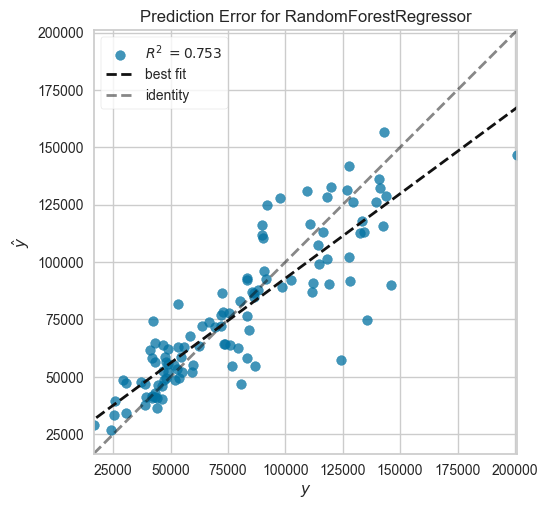

In [23]:
plot_model(tunned_model, plot='error')

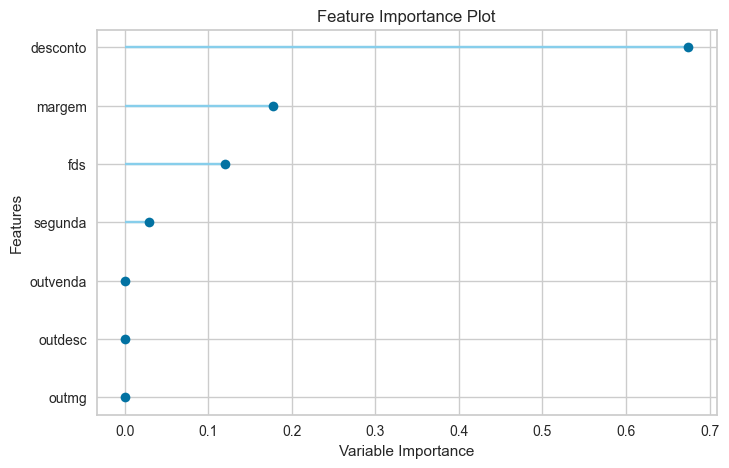

In [24]:
plot_model(tunned_model, plot='feature')

In [25]:
#Testando com dados de treinameto
p = predict_model(tunned_model)

In [26]:
#Finalizar o modelo
final_model = finalize_model(tunned_model)

In [27]:
#Previsao
print('Shape Test:', x_teste.shape)
prev = predict_model(final_model, data=x_teste)
prev.reset_index(inplace=True)
prev['prediction_label']

Shape Test: (30, 14)


0      42476.987261
1      69590.352098
2      59303.066233
3      79776.236806
4      75988.432292
5      66262.312724
6      43839.081684
7      36087.430060
8      70743.866855
9      68393.557928
10     58685.819235
11    120919.326382
12    114688.907979
13     32195.823412
14     29729.336071
15     66282.409534
16     53756.907335
17     62141.300275
18     49767.455129
19     59864.951997
20     29211.276794
21     41769.750752
22     74205.049262
23     43150.019878
24     78293.666956
25     63455.137384
26     66287.231836
27     25568.247562
28     38678.130794
29     53246.348163
Name: prediction_label, dtype: float64

In [28]:
prev.index.name=''
prev.rename(columns={'prediction_label': '0'}, inplace=True)
pd.DataFrame(prev['0']).to_csv('pred_baba.csv')